# sklearn 데이터를 활용한 Iris의 세가지 품종 분류하기
- 붓꽃의 종류가 setosa, versicolor, virginica 세 가지 중 무엇인지 맞추고자 함

# 1. 데이터 부르기 
- .keys(), .data, .target, .target_names, .DESCR, .feature_names, .filename

In [1]:
from sklearn.datasets import load_iris
# sklearn 라이브러리의 datasets 패키지에서 load_iris 함수를 임포트함

iris = load_iris()
# load_iris 함수는 iris 데이터셋을 로드하는 함수
# 로드된 iris 데이터셋을 iris라는 변수에 저장

print(dir(iris))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
iris.keys()
# iris 데이터셋에 담긴 정보 종류 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris_data = iris.data
# keys에서 확인한 정보 중 data를 따로 iris_data 변수에 저장

print(iris_data.shape) 
# shape는 배열의 형상정보를 출력
# 150개의 데이터가 각각 4개의 정보를 담고 있음

(150, 4)


In [4]:
iris_data[0]
# 150개의 데이터 중 첫 번째 데이터 출력

array([5.1, 3.5, 1.4, 0.2])

* 순서대로 sepal length, sepal width, petal length, petal width 정보를 담고 있다.

### Target 정보 확인하기

In [6]:
iris_label = iris.target
# keys에서 확인한 정보 중 target을 따로 iris_label 변수에 저장

print(iris_label.shape)
iris_label
# iris_data와 다르게 150개의 숫자만 가지고 있음

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names
# keys에서 확인한 정보 중 target_names를 변수에 따로 저장하지 않고 호출
# iris_label이 가진 0,1,2의 이름 확인

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
print(iris.DESCR)
# keys에서 확인한 정보 중 DESCR을 변수에 따로 저장하지 않고 호출
# 데이터셋 설명서 출력

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
iris.feature_names
# keys에서 확인한 정보 중 feature_names를 변수에 따로 저장하지 않고 호출
# iris.data에서 확인한 4개 정보의 변수명 확인

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.filename
# keys에서 확인한 정보 중 filename을 변수에 따로 저장하지 않고 호출
# 데이터셋의 이름 출력

'iris.csv'

# 2. 데이터 살펴보기

In [11]:
import pandas as pd
# pandas 라이브러리를 pd라는 약칭으로 임포트

print(pd.__version__)
# pandas의 버전 확인

1.3.3


### DataFrame 자료형으로 변환하기

In [12]:
type(iris_data)
# iris_data의 데이터 타입은 numpy의 ndarray인 것을 확인할 수 있음

numpy.ndarray

In [13]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
# 150개 데이터가 각각 4개의 정보를 가지고 있던 iris_data를 
# iris.feature_names을 컬럼명으로 하는 DataFrame 자료형으로 변환해서 iris_df 변수에 저장
# (원래 iris_data는 배열(np.array) 자료형이었음!)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
iris_df["label"] = iris.target
# iris_df에 label이라는 컬럼을 새로 추가
# 150개의 숫자로 이루어져 있었던 iris.target를 label 컬럼에 채워넣기
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


* data는 4가지의 feature들(문제지, X)이 들어있고, target에는 target(정답지, label, y)만 따로 떨어져있구나.

# 3. Machine Learning

## 1) 학습용 training dataset과 모델 성능을 평가용 test dataset으로 데이터셋을 나누기 
- train_test_split (validation과 test는 혼용되는 말이다)

In [16]:
from sklearn.model_selection import train_test_split
# sklearn model_selection패키지의 train_test_split 함수를 임포트

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
# 나눠야 할 데이터(문제지, X): iris_data
# 데이터의 라벨(정답, y): iris_label
# iris_data와 iris_label를 각각 train:test = 8:2의 비율로 잘라서 
# X_train, X_test, y_train, y_test에 저장


print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# len은 배열의 길이를 출력

X_train 개수:  120 , X_test 개수:  30
(120, 4) (120,) (30, 4) (30,)


## 2) 문제 정의하기
- 지도학습 (Supervised Learning) : 정답이 있는 문제에 대해 학습 (분류, 회귀)
- 비지도 학습 (Unsupervised Learning) : 정답이 없는 문제를 학습  

  
- 붓꽃은 지도학습 - 분류에 해당한다
- 관련 모델은 여러개가 있지만, 여기서는 Decision Tree를 사용

In [17]:
from sklearn.tree import DecisionTreeClassifier 
# sklearn.tree 패키지에서 의사결정트리 모델 import

decision_tree = DecisionTreeClassifier(random_state=32) 
# random_state : 재현가능하도록 난수의 초기값 32로 설정
print(decision_tree._estimator_type)

classifier


### 모델 학습

In [18]:
# 학습데이터 X_train, y_train로 의사결정나무 모델로 학습하기
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [19]:
# 테스트데이터 X_test로 예측하기
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [20]:
# 진짜 정답
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

### 성능 평가
- 정확도, 정밀도, 재현율, F1 score, ROC-AUC score 등등 다양한 metrics가 있다

In [21]:
# 실제 정답 y_test과 예측값 y_pred 비교하여 정확도 측정하기
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

# 4. 다른 모델로 평가해보기

In [22]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris #싸이킷런 데이터셋에 있는 iris를 불러오는 코드
from sklearn.model_selection import train_test_split #싸이킷런에 있는 데이터를 train과 test dataset으로 나누어주는 함수 import
from sklearn.tree import DecisionTreeClassifier # 싸이킷런에 있는 결정트리분류기를 사용하기 위해 불러오는 코드
from sklearn.metrics import classification_report #싸이킷런에 있는 분류 결과에 대한 시각화를 위해 쓰는 코드

# (2) 데이터 준비
iris = load_iris() #iris 데이터 전체를 불러온다.
iris_data = iris.data #iris데이터의 data컬럼을 분류해 iris_data 변수에 담는다.
iris_label = iris.target #iris데이터의 target컬럼을 분류해 iris_label 변수에 담는다.

# (3) train, test 데이터 분리
#train_test_split()를 사용하여 X값, y값을 각각 train data와 test data로 나눈다. 함수에 들어 갈 파라미터로는 x,y가 들어가고
#test_size는 몇대몇으로 나눌지 정하는 옵션, random_state는 랜덤 패턴의 값을 지정한다. (어떤 값을 넣어도 무방하다.)
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7) 


# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32) #결정트리분류기의 객체를 만든다.
decision_tree.fit(X_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred = decision_tree.predict(X_test) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.

print(classification_report(y_test, y_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred 값을 넣어 확인한다.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



## 1) Random Forest 모델
- Random Forest는 Decision Tree 모델을 여러 개 합쳐놓음으로써 Decision Tree의 단점을 극복한 모델. 이러한 기법을 앙상블(Ensemble) 기법이라고 합니다. 각각의 의사 결정 트리를 만들기 위해 쓰이는 특성들을 랜덤으로 선택한다.
- “앙상블” (Ensemble method) : 의견을 통합하거나 여러가지 결과를 합치는 방식
- 분류 : 여러 개의 작은 결정 트리가 예측한 값들 중 가장 많은 값
- 회귀 : 평균

In [23]:
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라는 분류기를 사용하기 위해 import

X_train, X_test, y_train, y_test = train_test_split(iris_data, # iris 데이터의 data 컬럼
                                                    iris_label, # iris 데이터의 target 컬럼
                                                    test_size=0.2, # test_size : train data와 test data를 몇대몇으로 나눌지 정하는 옵션
                                                    random_state=21) # random_state : 랜덤 패턴의 값을 지정

random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



## 2) Support Vector Machine (SVM)
- Support Vector와 Hyperplane(초평면)을 이용해서 분류를 수행하게 되는 대표적인 선형 분류 알고리즘
- 예시) 2 차원 공간에서, 즉 데이터에 2개의 클래스만 존재할 때,
   - Decision Boundary(결정 경계): 두 개의 클래스를 구분해 주는 선
   - Support Vector: Decision Boundary에 가까이 있는 데이터
   - Margin: Decision Boundary와 Support Vector 사이의 거리
   - Margin이 넓을수록 새로운 데이터를 잘 구분할 수 있다. (Margin 최대화 -> robustness 최대화)
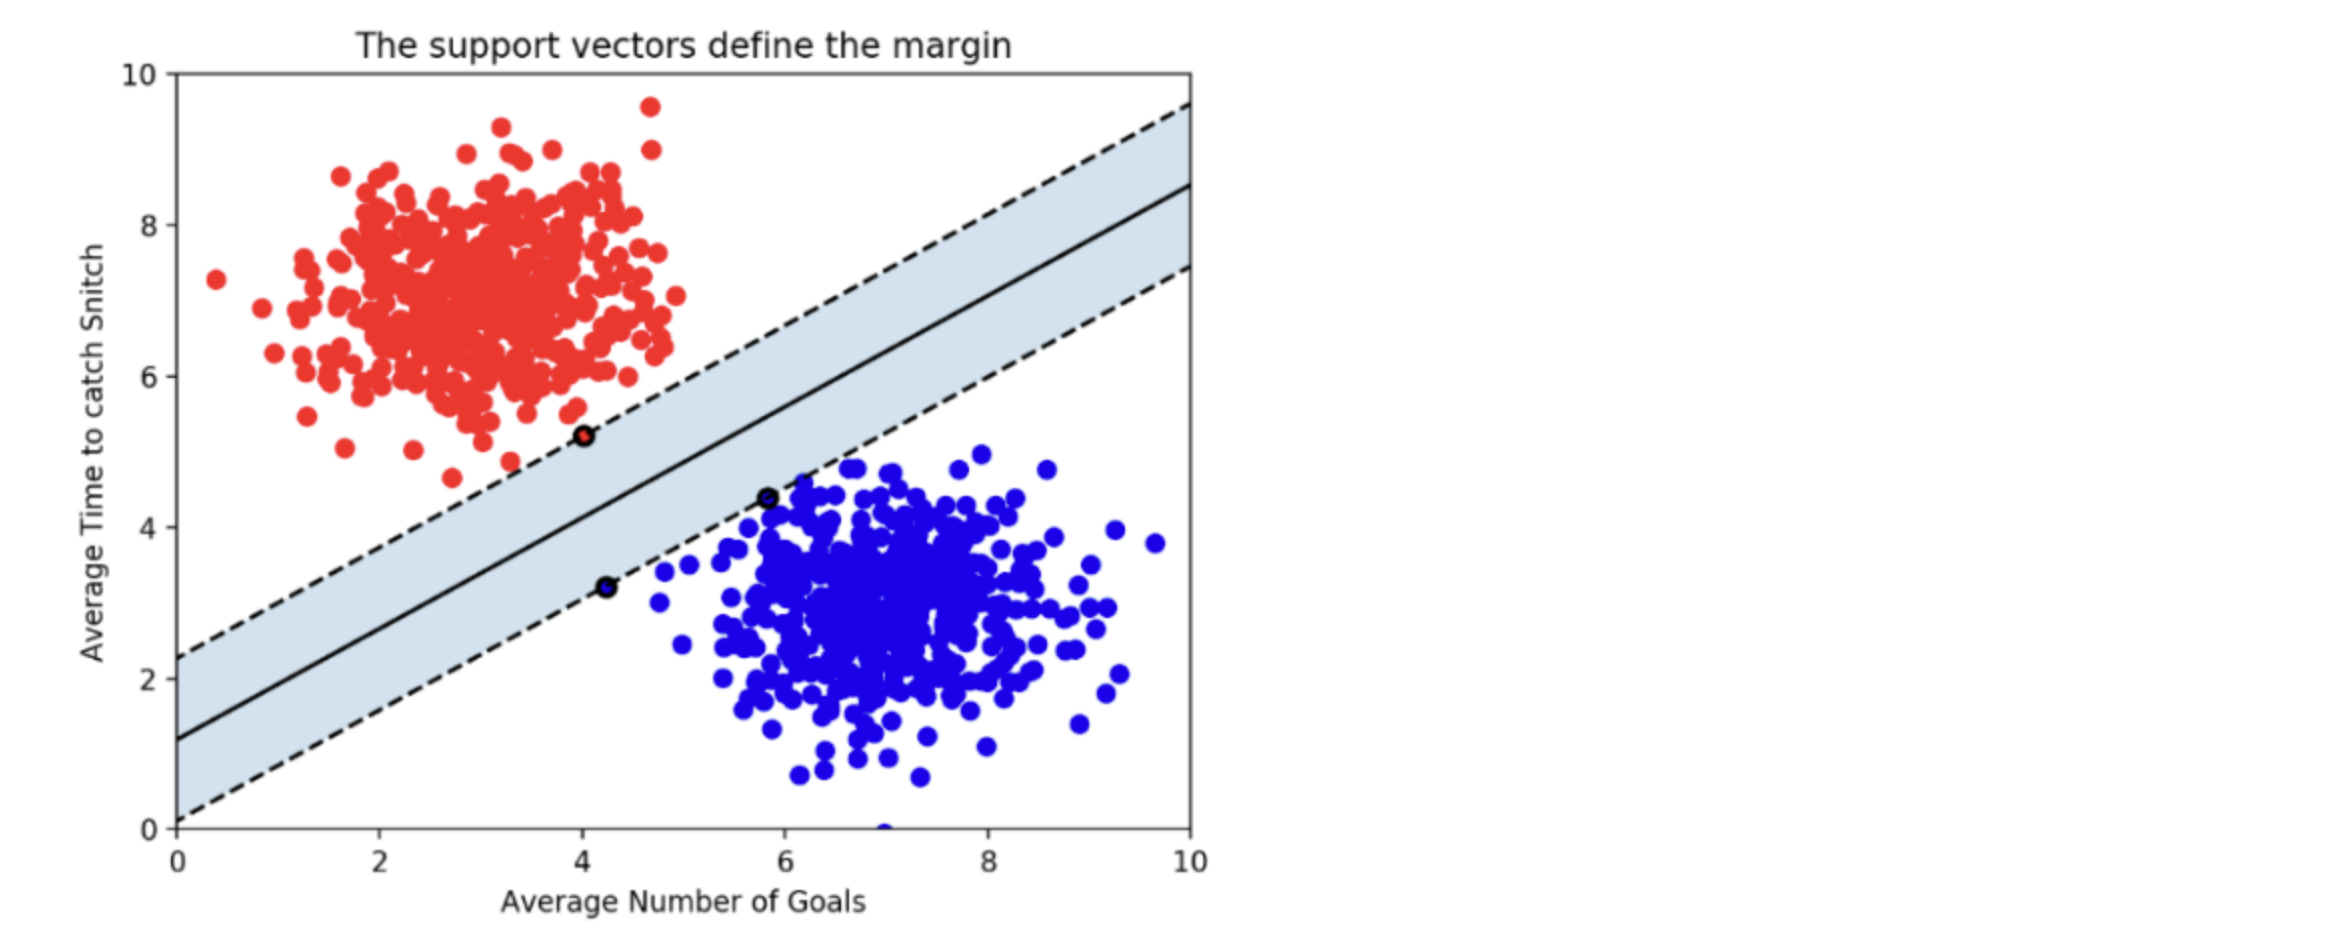


    - Kernel Trick: 저차원의 공간을 고차원의 공간으로 매핑해주는 작업. 데이터의 분포가 Linearly separable 하지 않을 경우 데이터를 고차원으로 이동시켜 Linearly separable하도록 만든다.
    - cost: Decision Boundary와 Margin의 간격 결정. cost가 높으면 Margin이 좁아지고 train error가 작아진다
    - γ: 한 train data당 영향을 미치는 범위 결정. γ가 커지면 영향을 미치는 범위가 줄어들고, Decision Boundary에 가까이 있는 데이터만이 선의 굴곡에 영향을 준다. 따라서 Decision Boundary는 구불구불하게 그어진다. (오버피팅 초래 가능) 작아지면 데이터가 영향을 미치는 범위가 커지고, 대부분의 데이터가 Decision Boundary에 영향을 준다. 따라서 Decision Boundary는 직선에 가까워진다.

In [24]:
from sklearn import svm #Support Vector Machine을 사용하기 위해 import
svm_model = svm.SVC() # 모델 객체를 만든다.

print(svm_model._estimator_type) # 이 모델이 어떤 타입인지 확인한다.

classifier


In [25]:
# 모델 학습 및 예측
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



## 3) Stochastic Gradient Descent Classifier (SGDClassifier)
- 확률적 경사하강법 : 배치 크기가 1인 경사하강법 알고리즘 입니다. 
-  데이터 세트에서 무작위로 균일하게 선택한 하나의 데이터 포인트를 이용하여 각 단계의 예측 경사를 계산합니다.
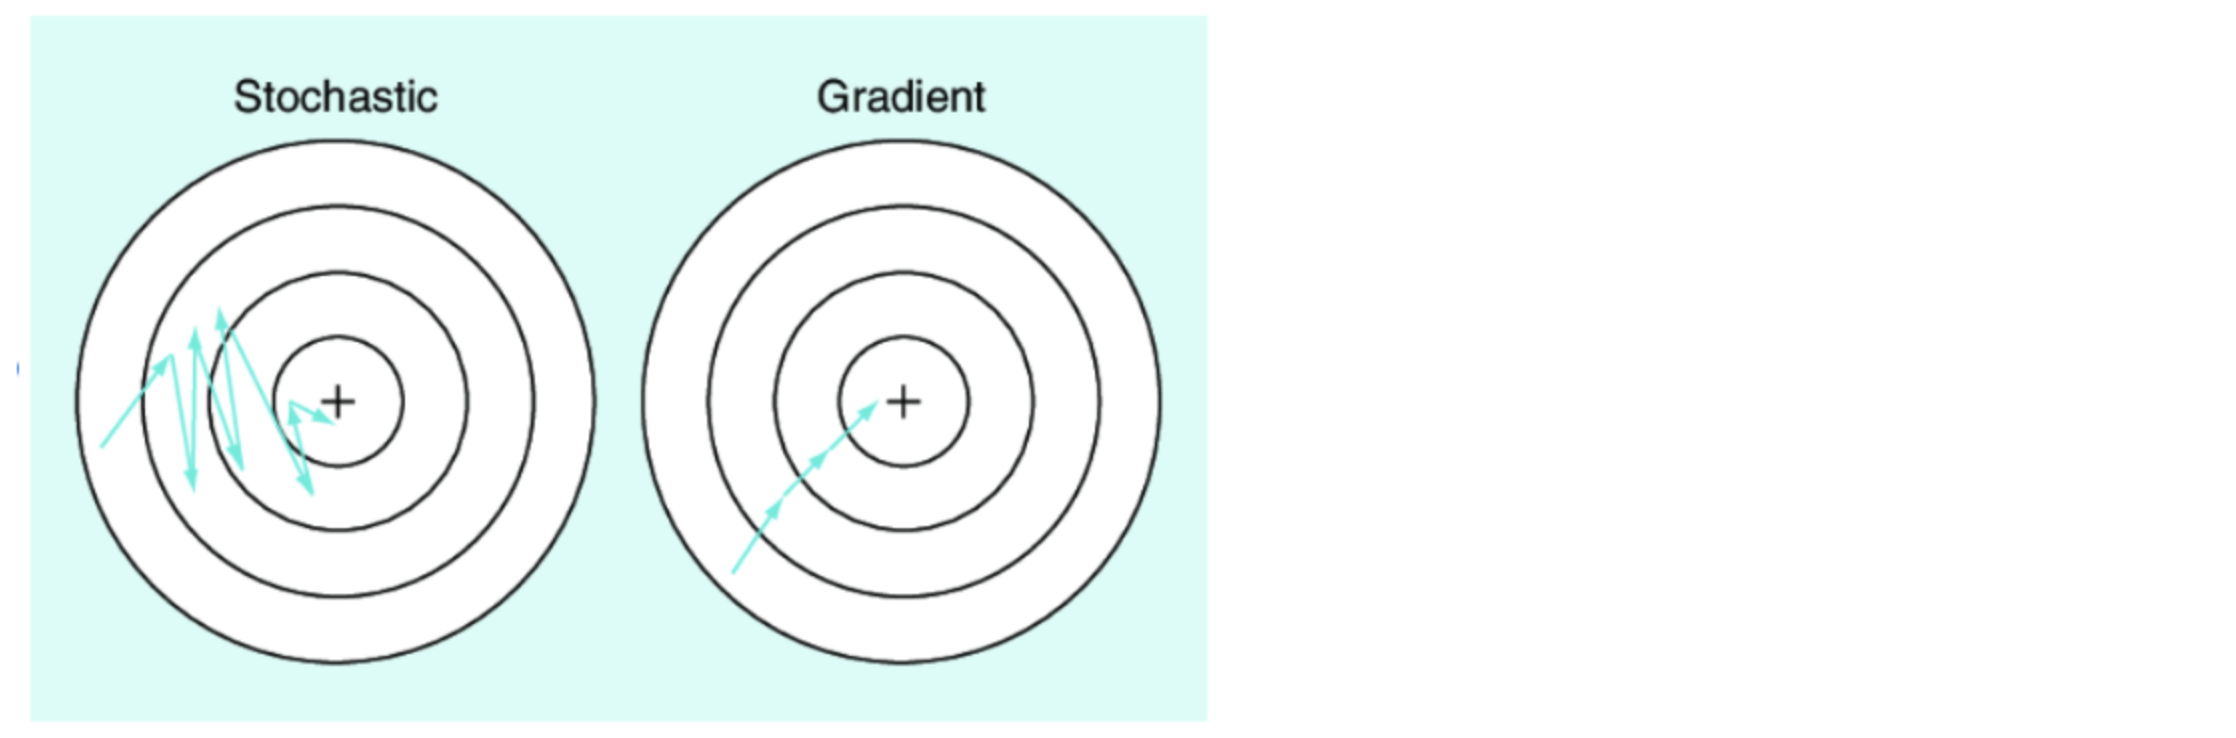

    - 배치 : 단일 반복에서 기울기를 계산하는 데 사용하는 예(data)의 총 개수. Gradient Descent 에서의 배치는 전체 데이터 셋라고 가정.
    - 하지만, 데이터셋이 너무 많으면, 단일 반복만으로도 엄청 오랜 시간이 걸릴 수도 있다.
    - 따라서, 랜덤선택을 한다. 데이터 세트에서 예(data)를 무작위로 선택하면 (노이즈는 있겠지만) 훨씬 적은 데이터 세트로 중요한 평균값을 추정할 수 있다.
    - (단점)  반복이 충분하면 SGD가 효과는 있지만 노이즈가 매우 심합니다. 확률적 경사하강법의 여러 변형 함수의 최저점에 가까운 점을 찾을 가능성이 높지만 항상 보장되지는 않습니다. (최저점을 찾지 못할 수 있음)
    - (보완)  미니 배치 확률적 경사하강법(미니 배치 SGD)는 전체 배치 반복과 SGD 의 절충안입니다.

In [26]:
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import
sgd_model = SGDClassifier() # 모델 객체 생성

print(sgd_model._estimator_type) # 이 모델의 타입을 확인

classifier


In [27]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      1.00      0.92        12
           2       1.00      0.71      0.83         7

    accuracy                           0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30



## 4) Logistic Regression
-  가장 널리 알려진 선형 분류 알고리즘.
- 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘이며, 다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 합니다. 
- 이름은 회귀지만, 실제로는 분류를 수행합니다.
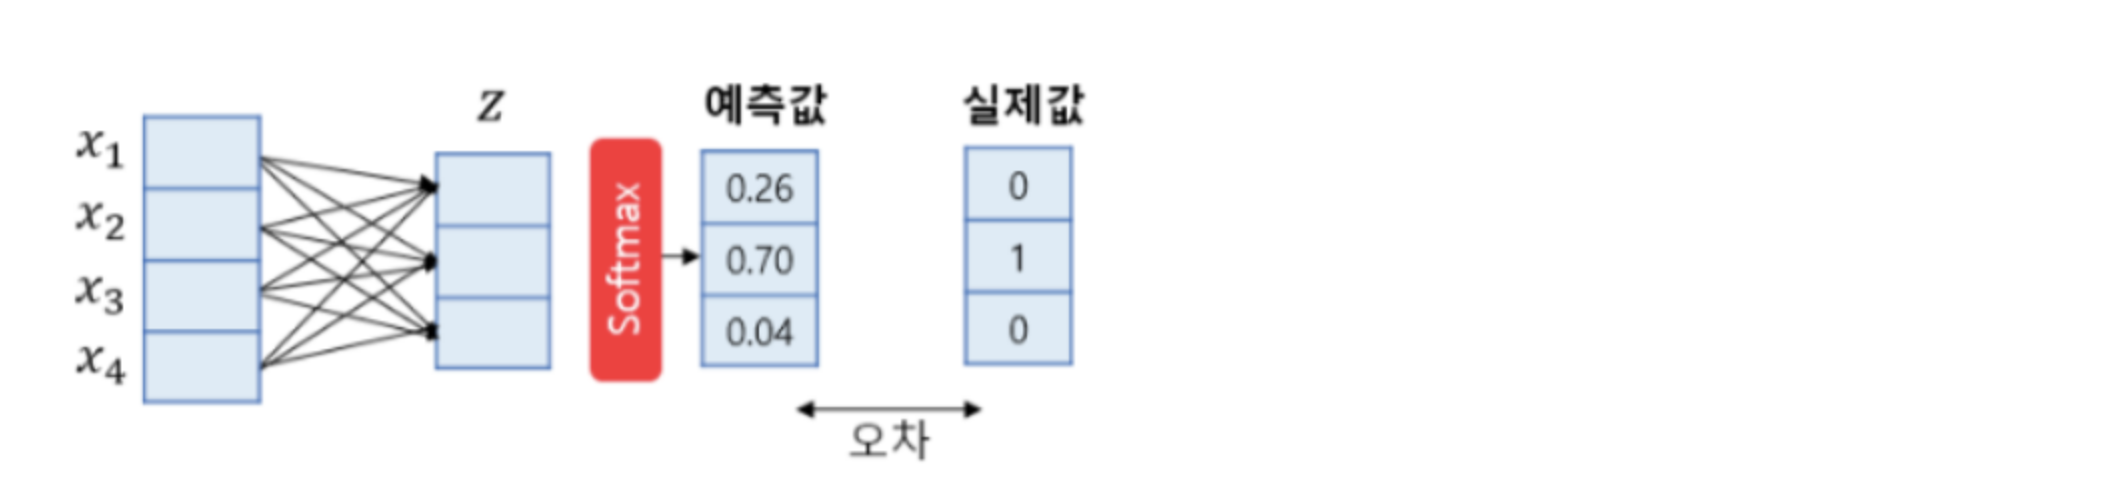

- 소프트맥스 함수: 클래스가 N개일 때, N차원의 벡터가 각 클래스가 정답일 확률을 표현하도록 정규화를 해주는 함수. 위의 그림은 4차원의 벡터를 입력으로 받아 3개의 클래스를 예측하는 경우의 소프트맥스 회귀의 동작 과정을 보여준다. 3개의 클래스 중 1개의 클래스를 예측해야 하므로 소프트맥스 회귀의 출력은 3차원의 벡터고, 각 벡터의 차원은 특정 클래스일 확률이다. 오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습됩니다.

In [28]:
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import
logistic_model = LogisticRegression() # 모델 객체 생성

print(logistic_model._estimator_type) # 이 모델의 타입을 확인

classifier


In [29]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



# 5. 평가 방식
- 정확도, 정밀도(음성을 양성으로 판단하면 안될때), 재현율(양성을 음성으로 판단하면 안될때), F1 Score, roc_auc_score
- Confusion Matrix :
    - TN(True Negative) : 건강한 사람에게 음성판정 (참 음성)
    - FP(False Positive) : 건강한 사람에게 양성판정 (거짓 양성)
    - FN(False Negative): 실제 환자에게 음성판정 (거짓 음성)
    - TP(True Positive) : 실제 환자에게 양성판정 (참 양성)
        - 전체 메일함에서 스팸 메일을 거르는 모델에게는, 메일 처리 모델은 스팸 메일을 못 거르는 것은 괜찮지만, 정상 메일을 스팸 메일로 분류하는 것은 더 큰 문제이다. 즉 음성을 양성으로 판단하면 안 된다. 따라서 Precision이 더 중요하다.
        -  암 환자를 진단하는 모델에게는, 암을 진단하는 경우 실제 환자를 한 명이라도 놓치면 안 된다. 즉 양성을 음성으로 판단하면 안 되기 때문에 Recall이 더 중요하다.


---

In [30]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

In [31]:
wine = load_wine()
breast = load_breast_cancer()

In [38]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [42]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [41]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [47]:
wine_data = wine.data
print(wine.feature_names)
print(wine_data.shape) 

breast_data = breast.data
print(breast.feature_names)
print(breast_data.shape)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
(178, 13)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)
